In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('healthcare_data.csv')

df['admission_date'] = pd.to_datetime(df['admission_date'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

In [ ]:
# Identify which department has the highest patient load to better allocate staff and improve scheduling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17498 entries, 0 to 17497
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   patient_id      17498 non-null  object        
 1   first_name      17498 non-null  object        
 2   last_name       17498 non-null  object        
 3   age             17498 non-null  int64         
 4   gender          17498 non-null  object        
 5   phone           17498 non-null  object        
 6   email           17498 non-null  object        
 7   department      17498 non-null  object        
 8   diagnosis       17498 non-null  object        
 9   treatment       17498 non-null  object        
 10  admission_date  17498 non-null  datetime64[ns]
 11  discharge_date  17498 non-null  datetime64[ns]
 12  status          17498 non-null  object        
 13  bill_amount     17498 non-null  float64       
 14  length_of_stay  17498 non-null  int64         
 15  tr

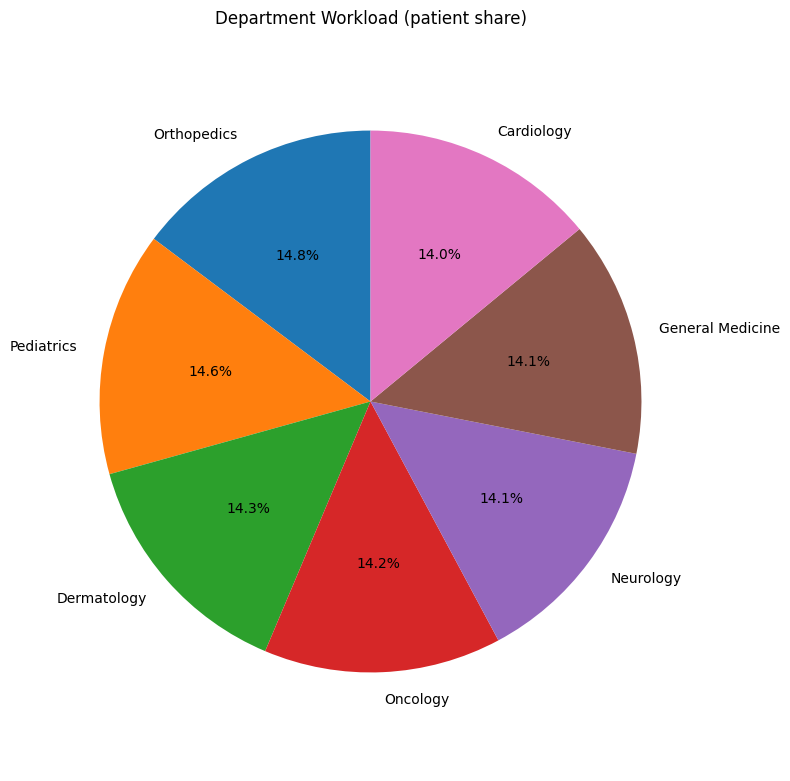

In [ ]:
# 1) Department Workload Analysis - Understand which department is 
# handling the most patients to optimize staff and resources.

dept_counts = df['department'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Department Workload (patient share)')
plt.axis('equal')
plt.tight_layout()
plt.show()


diagnosis
Fracture        2239
Flu             2214
Diabetes        2206
Migraine        2188
Asthma          2177
Hypertension    2175
Healthy         2150
Cancer          2149
Name: count, dtype: int64


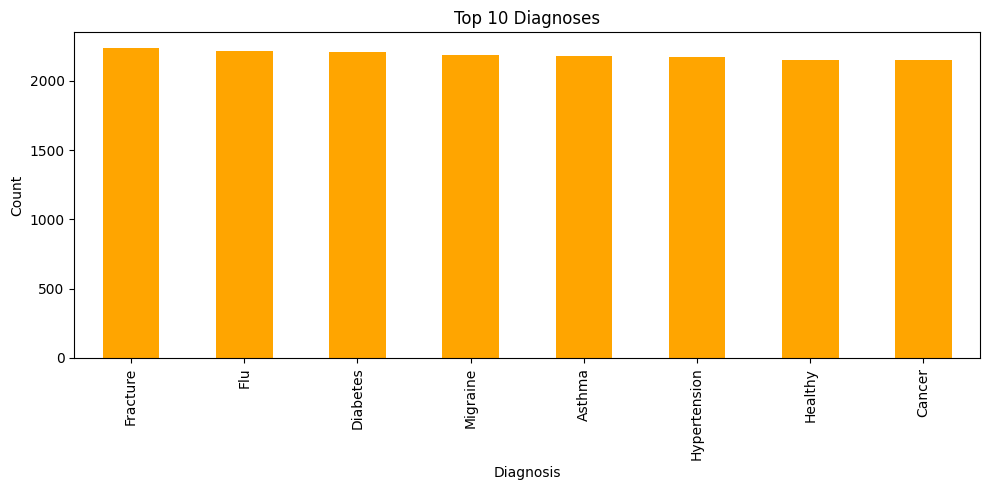

diagnosis
Fracture        45.745422
Flu             45.314815
Diabetes        45.722575
Migraine        45.496344
Asthma          45.244832
Hypertension    44.832644
Healthy         45.769302
Cancer          45.275942
Name: age, dtype: float64


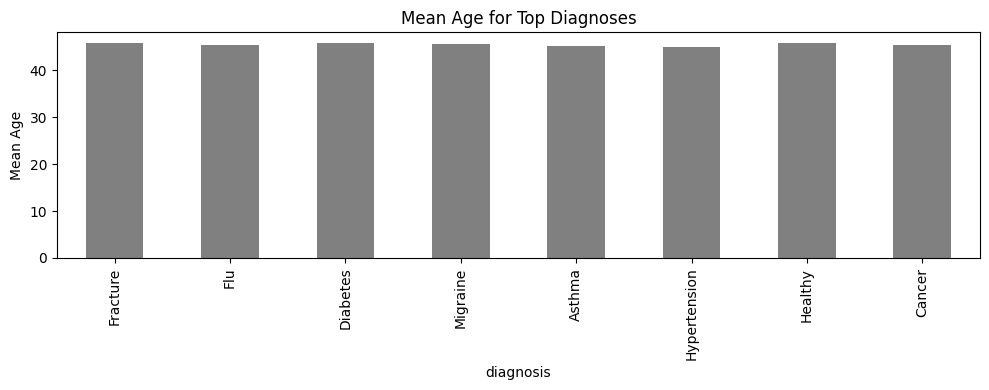

In [10]:
# 2) Disease Pattern Analysis 
# Identify common health issues to design targeted preventive health programs.

top_diag = df['diagnosis'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_diag.plot(kind='bar', color='orange')
print(top_diag)
plt.title('Top 10 Diagnoses'); 
plt.xlabel('Diagnosis'); 
plt.ylabel('Count'); 
plt.tight_layout(); 
plt.show()

mean_age_top = df.groupby('diagnosis')['age'].mean().loc[top_diag.index]
print(mean_age_top)
plt.figure(figsize=(10,4))
mean_age_top.plot(kind='bar', color='gray')
plt.title('Mean Age for Top Diagnoses'); 
plt.ylabel('Mean Age'); 
plt.tight_layout(); 
plt.show()

Unique Treatments: ['Medication' 'Observation' 'Vaccination' 'Therapy' 'Surgery']
Total: 5

Unique Diagnoses: ['Migraine' 'Diabetes' 'Asthma' 'Cancer' 'Fracture' 'Healthy' 'Flu'
 'Hypertension']
Total: 8


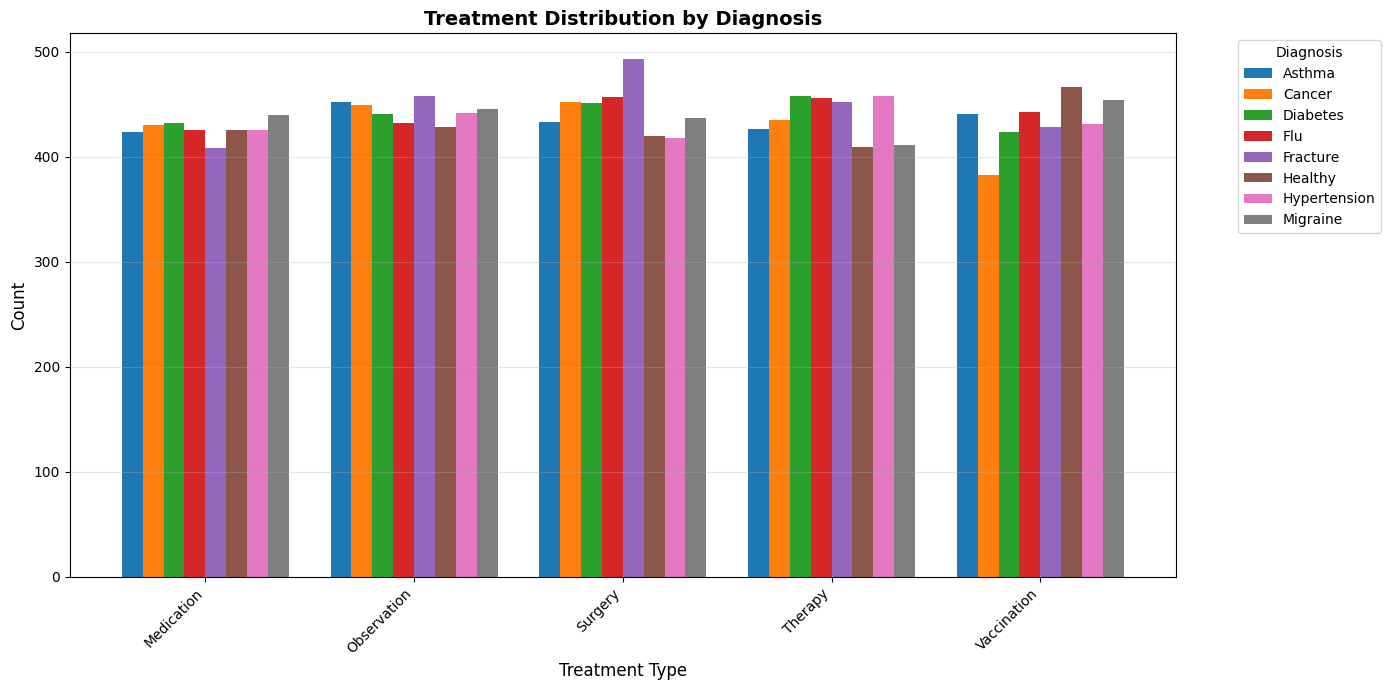


Treatment Distribution:
treatment_type
Surgery        3561
Observation    3548
Therapy        3506
Vaccination    3471
Medication     3412
Name: count, dtype: int64

Percentage:
treatment_type
Surgery        20.350897
Observation    20.276603
Therapy        20.036576
Vaccination    19.836553
Medication     19.499371
Name: proportion, dtype: float64

Breakdown by Diagnosis:
treatment_type  Medication  Observation  Surgery  Therapy  Vaccination
diagnosis                                                             
Asthma                 424          452      433      427          441
Cancer                 430          449      452      435          383
Diabetes               432          441      451      458          424
Flu                    426          432      457      456          443
Fracture               408          458      493      452          428
Healthy                426          428      420      409          467
Hypertension           426          442      418      4

In [ ]:

print("Unique Treatments:", df['treatment'].unique())
print(f"Total: {df['treatment'].nunique()}")
print("\nUnique Diagnoses:", df['diagnosis'].unique())
print(f"Total: {df['diagnosis'].nunique()}")

# Direct mapping of treatment types 
df['treatment_type'] = df['treatment']
treatment_by_diagnosis = df.groupby(['diagnosis', 'treatment_type']).size().unstack(fill_value=0)

# Grouped Histogram: Treatment by Diagnosis
fig, ax = plt.subplots(figsize=(14, 7))

treatment_by_diagnosis.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Treatment Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Treatment Distribution by Diagnosis', fontsize=14, fontweight='bold')
ax.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nTreatment Distribution:")
print(df['treatment_type'].value_counts())
print(f"\nPercentage:\n{df['treatment_type'].value_counts(normalize=True) * 100}")
print("\nBreakdown by Diagnosis:")
print(treatment_by_diagnosis)

In [4]:
# 4) Monitor patient stay durations to improve bed management 


df['admission_date'] = pd.to_datetime(df['admission_date'], errors='coerce')
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')
 
mask = (df['discharge_date'] < df['admission_date']) & ((df['admission_date'] - df['discharge_date']).dt.days <= 365)
df.loc[mask, ['admission_date', 'discharge_date']] = df.loc[mask, ['discharge_date', 'admission_date']].values
 
df['length_of_stay'] = (df['discharge_date'] - df['admission_date']).dt.days
df.loc[df['length_of_stay'] < 0, 'length_of_stay'] = pd.NA
 
print(f"Remaining negatives: {(df['length_of_stay'] < 0).sum()}")
df.to_csv('healthcare_data_corrected.csv', index=False)
print('Saved healthcare_data_corrected.csv')
print(df['length_of_stay'].dropna().describe())
 
df["length_of_stay"] = (df["discharge_date"] - df["admission_date"]).dt.days
 
df[['admission_date', 'discharge_date', 'length_of_stay']].head(20)

Remaining negatives: 0
Saved healthcare_data_corrected.csv
count    17498.000000
mean       242.263573
std        171.920449
min          0.000000
25%         95.000000
50%        214.000000
75%        363.000000
max        728.000000
Name: length_of_stay, dtype: float64


,admission_date,discharge_date,length_of_stay
0,2024-02-10,2025-06-01,477
1,2023-11-18,2025-01-26,435
2,2023-12-04,2025-03-02,454
3,2023-12-25,2024-10-07,287
4,2024-11-15,2025-02-14,91
5,2024-05-30,2024-12-05,189
6,2024-08-08,2025-06-30,326
7,2025-01-12,2025-08-03,203
8,2023-10-02,2025-02-11,498
9,2025-02-07,2025-03-20,41


In [8]:
print("---Average length of stay by department--")
dept_los=df.groupby('department')['length_of_stay'].agg(['mean','median','max','count']).round(2)
print(dept_los.sort_values('mean',ascending=False))

print("\n---Top 5 diagnosis with long stay--")
dept_los=df.groupby('diagnosis')['length_of_stay'].agg(['mean','count']).round(1)
print(dept_los.sort_values('mean',ascending=False).head())

print("\n---Average loss by patient status--")
dept_los=df.groupby('status')['length_of_stay'].agg(['mean','median','count']).round(2)
print(dept_los.sort_values('mean',ascending=False))



---Average length of stay by department--
                    mean  median  max  count
department                                  
General Medicine  247.33   218.0  725   2463
Pediatrics        243.44   218.0  723   2550
Cardiology        243.20   214.0  711   2453
Dermatology       242.05   212.5  728   2506
Neurology         242.03   215.0  721   2464
Orthopedics       239.25   205.0  703   2581
Oncology          238.68   210.0  721   2481

---Top 5 diagnosis with long stay--
            mean  count
diagnosis              
Migraine   245.2   2188
Diabetes   244.5   2206
Fracture   243.6   2239
Cancer     243.2   2149
Asthma     242.8   2177

---Average loss by patient status--
                   mean  median  count
status                                
Discharged       243.05   212.0   5755
Admitted         242.35   215.0   5883
Under Treatment  241.40   215.0   5860


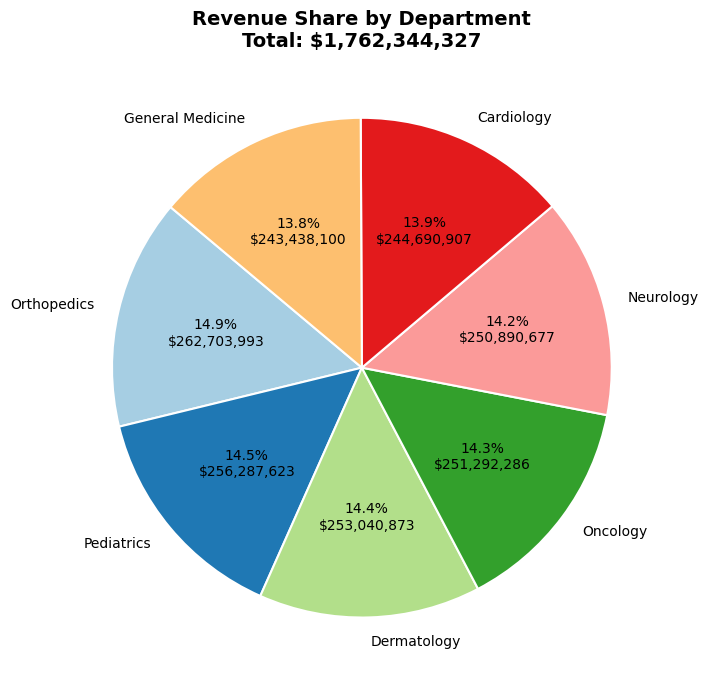

In [31]:
# 5) Analyze revenue by department and treatment 
# to better manage finances and identify high-cost areas.
revenue_per_department = df.groupby(
    'department')['bill_amount'].sum().sort_values(ascending=False)
total_revenue = revenue_per_department.sum()
def show_percent_and_amount(all_values):
    def format_slice(percentage):
        actual_amount = percentage * sum(all_values) / 100.0
        return f'{percentage:.1f}%\n${actual_amount:,.0f}'
    return format_slice


plt.figure(figsize=(10, 7))
plt.pie(
    revenue_per_department,
    labels=revenue_per_department.index,
    autopct=show_percent_and_amount(revenue_per_department),
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title(
    f'Revenue Share by Department\nTotal: ${total_revenue:,.0f}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_5616\1665708366.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(groups, labels=labels, patch_artist=True)


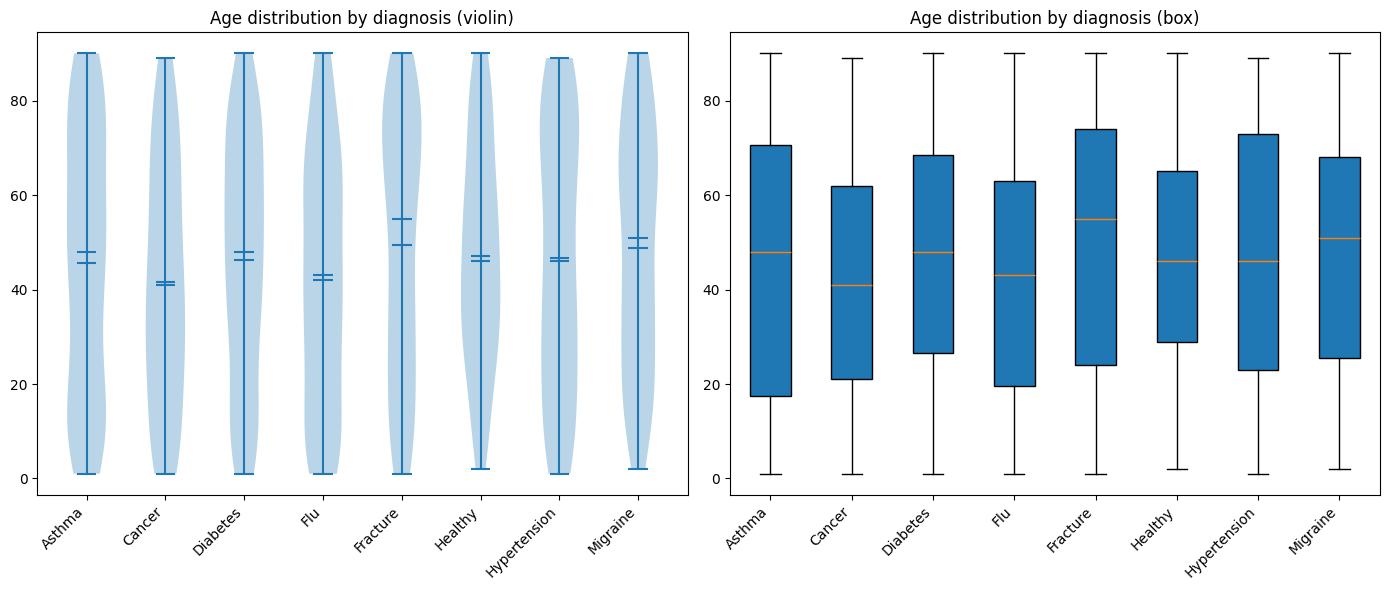

In [38]:
# 6) Spot which age groups are most affected by 
# certain diseases for focused preventive care.

df = df.dropna(subset=["age", "diagnosis"])
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df = df.dropna(subset=["age"])
groups = [g["age"].values for _, g in df.groupby("diagnosis")]
labels = [str(k) for k, _ in df.groupby("diagnosis")]

# plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# violin 
axes[0].violinplot(groups, showmeans=True, showmedians=True)
axes[0].set_xticks(range(1, len(labels) + 1))
axes[0].set_xticklabels(labels, rotation=45, ha="right")
axes[0].set_title("Age distribution by diagnosis (violin)")

# boxplot
axes[1].boxplot(groups, labels=labels, patch_artist=True)
axes[1].set_xticklabels(labels, rotation=45, ha="right")
axes[1].set_title("Age distribution by diagnosis (box)")

plt.tight_layout()
plt.show()
# fig.savefig("age_by_diagnosis.png", dpi=150)

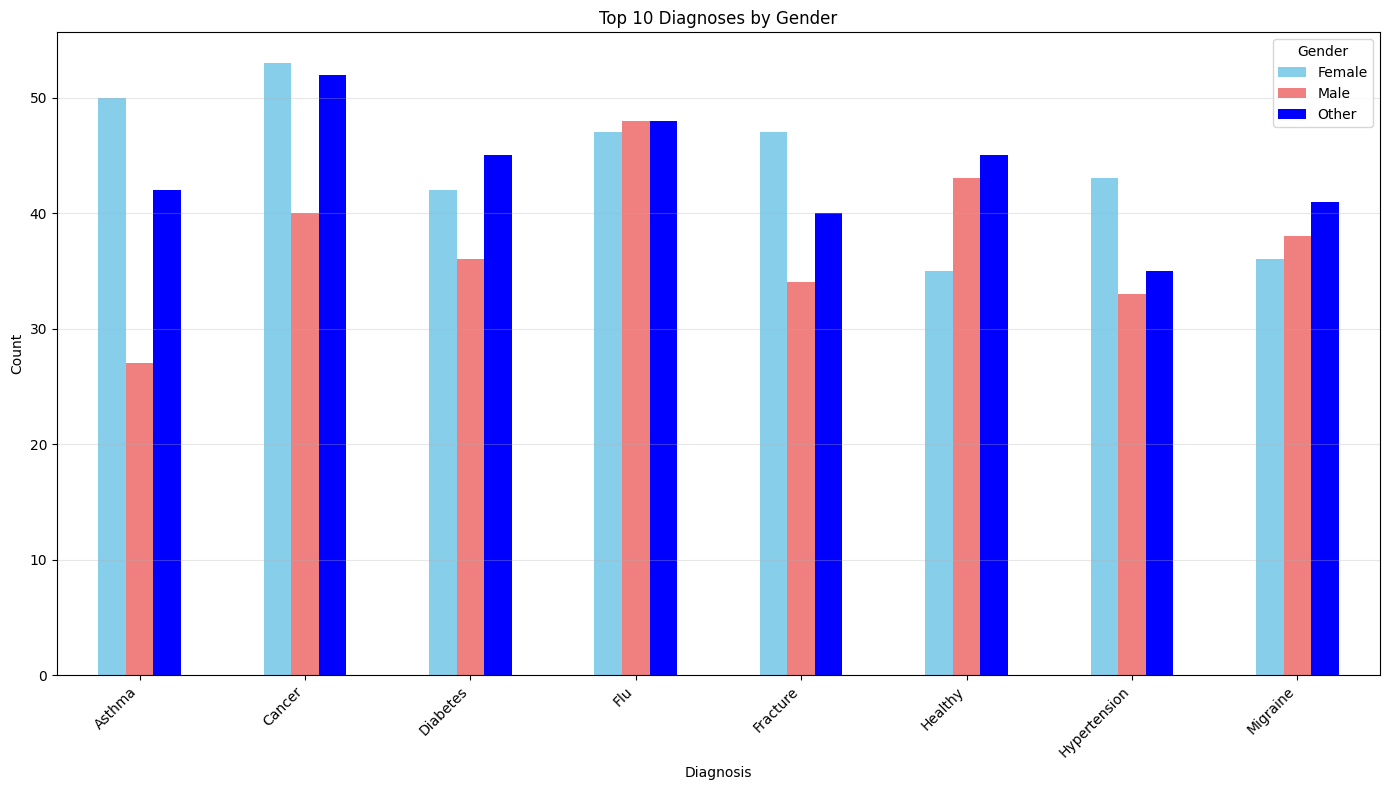

In [37]:
#7) Uncover disease trends based on gender to inform better health strategies.
# It helps identify which diagnoses are more prevalent in males vs females.

import matplotlib.pyplot as plt
top_diags = df['diagnosis'].value_counts().head(10).index
diag_gender = df[df['diagnosis'].isin(top_diags)].groupby(['diagnosis', 'gender']).size().unstack().fillna(0)
plt.figure(figsize=(14,8))
diag_gender.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral','blue'])
plt.title('Top 10 Diagnoses by Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

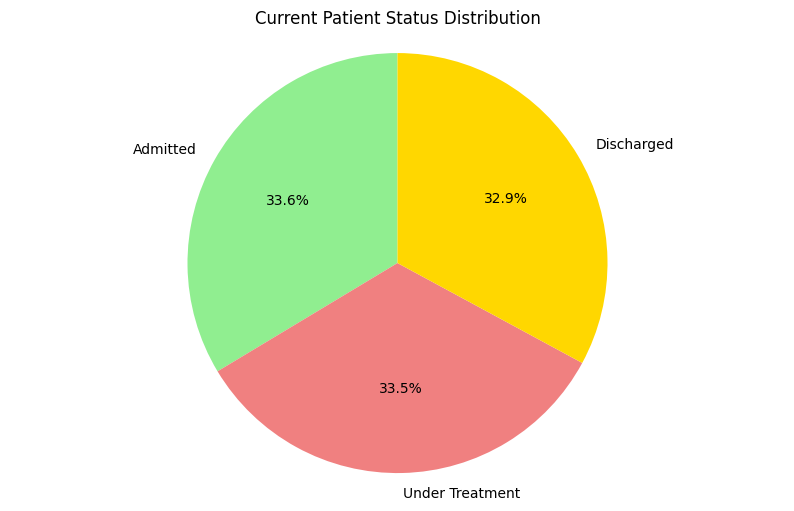

Current Patient Status Counts:
status
Admitted           5883
Under Treatment    5860
Discharged         5755
Name: count, dtype: int64


In [14]:
# 8th
# Track current patient admissions and admission trends to manage hospital capacity.

admitted_counts = df['status'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(admitted_counts, labels=admitted_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'gold'], startangle=90)
plt.title('Current Patient Status Distribution')
plt.axis('equal')
plt.show()

# Print the counts
print("Current Patient Status Counts:")
print(admitted_counts)


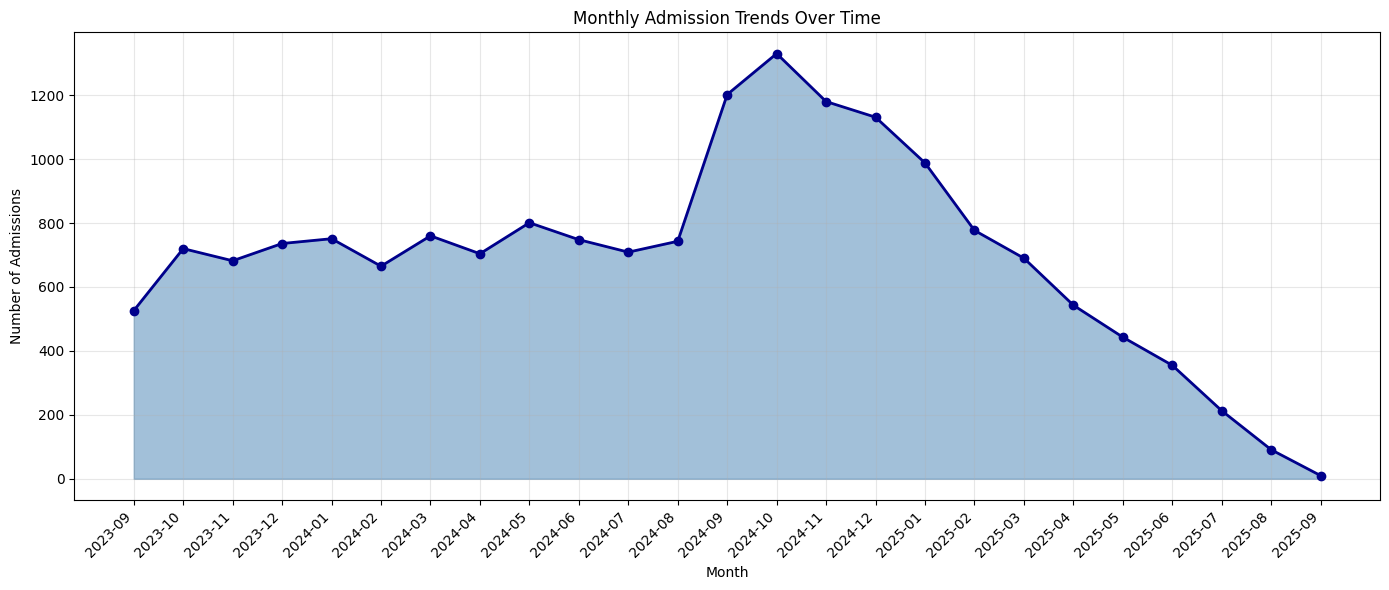

In [15]:

# Monthly admission trends - this area plot shows the cumulative pattern of admissions over time
df['admission_month'] = pd.to_datetime(df['admission_date']).dt.to_period('M')
monthly_admissions = df.groupby('admission_month').size()
plt.figure(figsize=(14,6))
plt.fill_between(range(len(monthly_admissions)), monthly_admissions.values, alpha=0.5, color='steelblue')
plt.plot(monthly_admissions.values, marker='o', color='darkblue', linewidth=2, markersize=6)
plt.title('Monthly Admission Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(range(len(monthly_admissions)), monthly_admissions.index.astype(str), rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

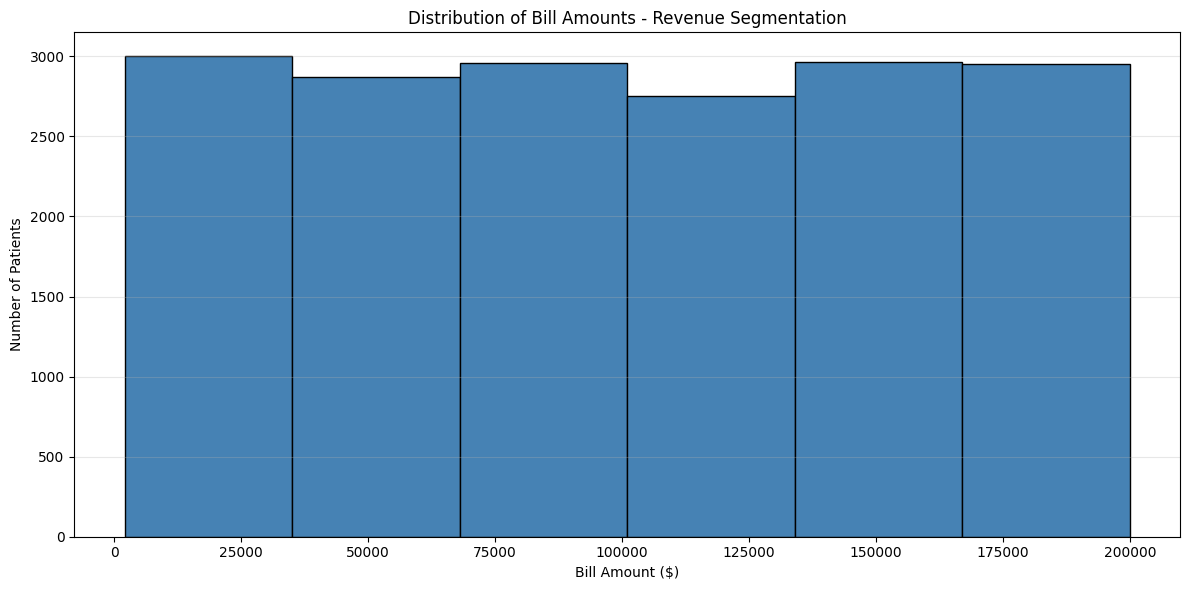

Revenue Statistics:
Total Revenue: $1,762,344,327.14
Average Bill Amount: $100,716.90
Min Bill Amount: $2,009.66
Max Bill Amount: $199,991.66


In [30]:
# 9 Identify top-paying patients to refine insurance and premium service offerings.
# This helps identify revenue patterns and clustering of patient costs

plt.figure(figsize=(12,6))
plt.hist(df['bill_amount'], bins=6, color='steelblue', edgecolor='black')
plt.title('Distribution of Bill Amounts - Revenue Segmentation')
plt.xlabel('Bill Amount ($)')
plt.ylabel('Number of Patients')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate revenue statistics
print("Revenue Statistics:")
print(f"Total Revenue: ${df['bill_amount'].sum():,.2f}")
print(f"Average Bill Amount: ${df['bill_amount'].mean():,.2f}")
print(f"Min Bill Amount: ${df['bill_amount'].min():,.2f}")
print(f"Max Bill Amount: ${df['bill_amount'].max():,.2f}")

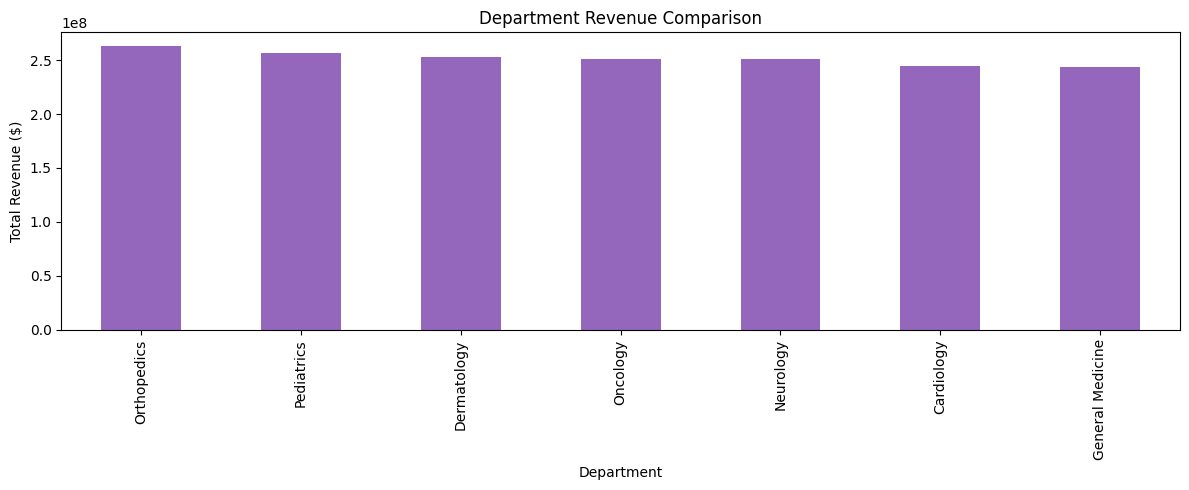

In [13]:
#10 Department Revenue Comparison
# Compare revenue across departments 
# to identify the most profitable ones and optimize resources.

dept_revenue = df.groupby('department')['bill_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
dept_revenue.plot(kind='bar', color='tab:purple')
plt.title('Department Revenue Comparison')
plt.xlabel('Department')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()